In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
from scipy import stats
import os
import timeit
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #from model_selection instead of cross_validation
from sklearn.model_selection import validation_curve #from model_selection instead of learning_curve
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

certain portion of code was borrowed from "Hands-On Machine Learning with Scikit-Learn and TensorFlow" Book

In [2]:
# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "classification"
DATASET_ID = "_red-wine_" # for red wine dataset

# Functions
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, PROJECT_ID + DATASET_ID + fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    
def plot_curve(sizes, data, dots=True, **kwargs):
    mu, std = data.mean(1), data.std(1)
    if dots:
        lines = plt.plot(sizes, mu, 'o-', **kwargs)
    else:
        lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)
    
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df

# Red Wine Quality Dateset (only red wine data)
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Saving figure original_histogram


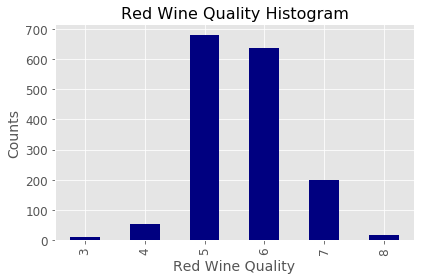

In [3]:
# load csv file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';') 

column_list = list(df.columns)[0:-1]
print (column_list)

# plot red wine quality counts histogram
df.quality.value_counts().sort_index().plot(kind = 'bar', cmap=plt.get_cmap("jet"))
plt.xlabel('Red Wine Quality'); plt.ylabel('Counts')
plt.title('Red Wine Quality Histogram', fontsize=16)
save_fig('original_histogram', tight_layout=True)

Saving figure lumped_histogram


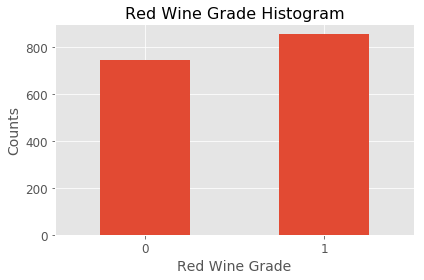

In [4]:
# Since some of the categories don't have enough samples, all categories are lumped into two major categories
# Grade 1: quality equal or better than 6: 'Good Wine'
# Grade 2: all others: 'Bad Wine'
df['grade'] = np.array([1 if i>=6 else 0 for i in df['quality']])
target = 'grade'

# plot lumped cagegories
df.grade.value_counts().sort_index(ascending=True).plot(kind = 'bar')
plt.xticks(rotation=0)
plt.xlabel('Red Wine Grade'); plt.ylabel('Counts')
plt.title('Red Wine Grade Histogram', fontsize=16)
save_fig('lumped_histogram', tight_layout=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
#np.savetxt("winedataexport.txt", df_copy.values, delimiter=",", newline='\n',fmt='%.1f,%.2f,%.2f,%.1f,%.3f,%.1f,%.1f,%.4f,%.2f,%.2f,%.1f,%d')

In [7]:
# np.savetxt("winedataexport.txt", df_copy.values, delimiter=",", newline='\r\n',fmt='%.1f,%.2f,%.2f,%.1f,%.3f,%.1f,%.1f,%.4f,%.2f,%.2f,%.1f,%d')

since this binary dataset is well balanced, a simple accuracy calculation could do a good model evaluation job

https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/

In [18]:
X = df[column_list].values
y = df[target].values

# Data normalization is important for ANN
df_norm = normalize_data(df, column_list) 
X_norm = df_norm[column_list].values
y_norm = df[target].values

# Data shuffling
X, y = shuffle(X, y, random_state=123)
X_norm, y_norm = shuffle(X_norm, y_norm, random_state=123)


# Data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size = 0.3, random_state=123)

#X_train_size = X_train.shape[0]

In [21]:
training_set = np.c_[X_train, y_train]
testing_set = np.c_[X_test, y_test]
np.savetxt("wine_train.txt", training_set, delimiter=",", newline='\r\n',
           fmt='%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%d')
np.savetxt("wine_test.txt", testing_set, delimiter=",", newline='\r\n',
           fmt='%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%d')

training_set_norm = np.c_[X_norm_train, y_norm_train]
testing_set_norm = np.c_[X_norm_test, y_norm_test]
np.savetxt("wine_train_norm.txt", training_set, delimiter=",", newline='\r\n',
           fmt='%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%d')
np.savetxt("wine_test_norm.txt", testing_set, delimiter=",", newline='\r\n',
           fmt='%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%d')

In [10]:
print (training_set.shape, testing_set.shape)
print (training_set_norm.shape, testing_set_norm.shape)

(1119, 12) (480, 12)
(1119, 12) (480, 12)


In [11]:
stats.describe(y_train)

DescribeResult(nobs=1119, minmax=(0, 1), mean=0.53083109919571048, variance=0.24927220668850447, skewness=-0.12355952115055847, kurtosis=-1.984733044733045)

In [12]:
stats.describe(y_norm_train)

DescribeResult(nobs=1119, minmax=(0, 1), mean=0.53083109919571048, variance=0.24927220668850447, skewness=-0.12355952115055847, kurtosis=-1.984733044733045)

In [13]:
df.grade.value_counts(normalize=True)

1    0.534709
0    0.465291
Name: grade, dtype: float64

In [14]:
X_train

array([[  9.9  ,   0.35 ,   0.41 , ...,   3.21 ,   0.5  ,   9.5  ],
       [  9.9  ,   0.59 ,   0.07 , ...,   3.31 ,   0.71 ,   9.8  ],
       [  6.8  ,   0.81 ,   0.05 , ...,   3.51 ,   0.66 ,  10.8  ],
       ..., 
       [ 10.9  ,   0.32 ,   0.52 , ...,   3.28 ,   0.77 ,  11.5  ],
       [ 10.4  ,   0.575,   0.61 , ...,   3.16 ,   0.69 ,   9.   ],
       [  7.9  ,   0.35 ,   0.46 , ...,   3.35 ,   0.86 ,  12.8  ]])

# MLPClassifier

# data normalizing is important for MLPClassifier

Saving figure MLP Learning Curve 1 (relu)


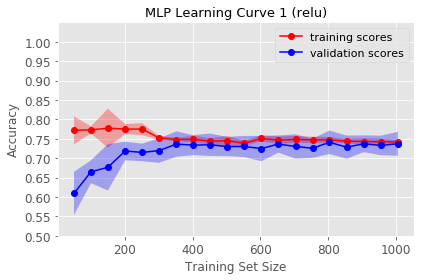

In [123]:
def plot_learning_curve_mlp():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300, activation = 'relu', random_state=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    #plt.figure(figsize=(8,6))
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 1 (relu)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 1 (relu)', tight_layout=True)
    
plot_learning_curve_mlp()

Saving figure MLP Learning Curve 1 (relu)


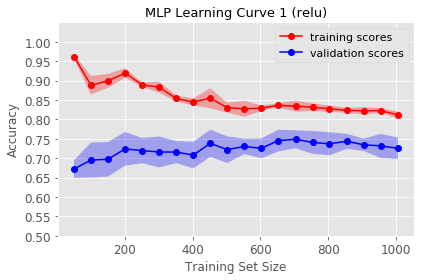

In [124]:
def plot_learning_curve_mlp_norm():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300, activation = 'relu', random_state=1),
                                                  X_norm_train, y_norm_train, train_sizes=train_sizes, cv=10)
    #plt.figure(figsize=(8,6))
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 1 (relu)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 1 (relu)', tight_layout=True)
    
plot_learning_curve_mlp_norm()

Saving figure MLP Learning Curve 2 (logistic)


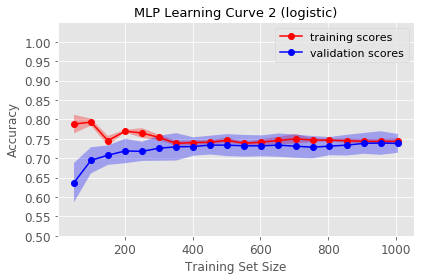

In [125]:
def plot_learning_curve_mlp2():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300, activation = 'logistic',random_state=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    #plt.figure(figsize=(8,6))
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 2 (logistic)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 2 (logistic)', tight_layout=True)
    
plot_learning_curve_mlp2()

Saving figure MLP Learning Curve 2 (logistic)(norm)


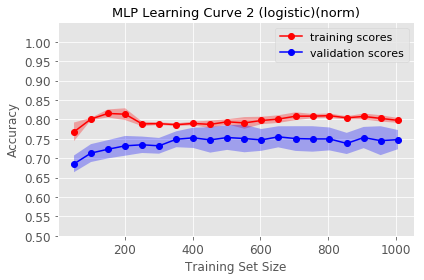

In [126]:
def plot_learning_curve_mlp2_norm():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300, activation = 'logistic',random_state=1),
                                                  X_norm_train, y_norm_train, train_sizes=train_sizes, cv=10)
    #plt.figure(figsize=(8,6))
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 2 (logistic)(norm)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 2 (logistic)(norm)', tight_layout=True)
    
plot_learning_curve_mlp2_norm()

Saving figure MLP Learning Curve 3 (max_iter)(relu)


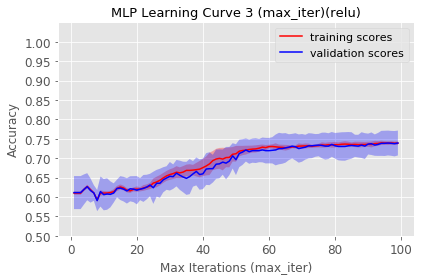

In [142]:
def plot_learning_curve_mlp3():
    param_name="max_iter"
    param_range=range(1, 100, 1)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r', dots=False)
    plot_curve(param_range, val_test, label='validation scores', color = 'b', dots=False)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Iterations (max_iter)'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 3 (max_iter)(relu)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 3 (max_iter)(relu)', tight_layout=True)

plot_learning_curve_mlp3()

Saving figure MLP Learning Curve 3 (max_iter)(relu)(norm)


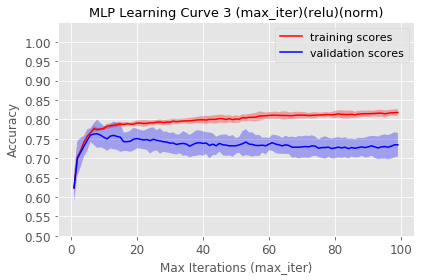

In [143]:
def plot_learning_curve_mlp3_norm():
    param_name="max_iter"
    param_range=range(1, 100, 1)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=0),
                                           X_norm_train, y_norm_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r',dots=False)
    plot_curve(param_range, val_test, label='validation scores', color = 'b', dots=False)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Iterations (max_iter)'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 3 (max_iter)(relu)(norm)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 3 (max_iter)(relu)(norm)', tight_layout=True)

plot_learning_curve_mlp3_norm()

Saving figure MLP Learning Curve 4 (max_iter)(logistic)


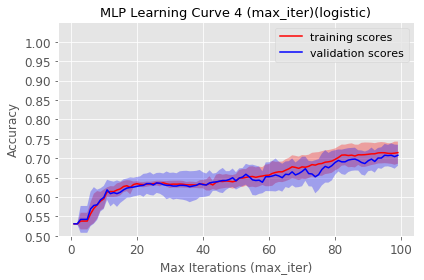

In [138]:
def plot_learning_curve_mlp4():
    param_name="max_iter"
    param_range=range(1, 100, 1)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, activation = 'logistic', random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r', dots=False)
    plot_curve(param_range, val_test, label='validation scores', color = 'b', dots=False)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Iterations (max_iter)'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 4 (max_iter)(logistic)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 4 (max_iter)(logistic)', tight_layout=True)

plot_learning_curve_mlp4()

Saving figure MLP Learning Curve 4 (max_iter)(logistic)(norm)


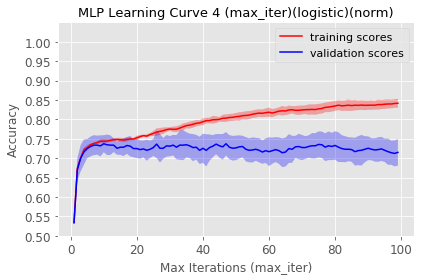

In [140]:
def plot_learning_curve_mlp4_norm():
    param_name="max_iter"
    param_range=range(1, 100, 1)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, activation = 'logistic', random_state=0),
                                           X_norm_train, y_norm_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r', dots=False)
    plot_curve(param_range, val_test, label='validation scores', color = 'b', dots=False)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Iterations (max_iter)'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 4 (max_iter)(logistic)(norm)', fontsize=13)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 4 (max_iter)(logistic)(norm)', tight_layout=True)

plot_learning_curve_mlp4_norm()

In [20]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300,random_state=0)
mlp_clf.fit(X_train, y_train)
test_score = mlp_clf.score(X_train, y_train)
print ('ANN Model Prediction Accuracy on Training Data: {:.4f}'.format(test_score))
test_score = mlp_clf.score(X_test, y_test)
print ('ANN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

ANN Model Prediction Accuracy on Training Data: 0.8114
ANN Model Prediction Accuracy on Test Data: 0.7583


In [16]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300,random_state=0)
mlp_clf.fit(X_norm_train, y_norm_train)
test_score = mlp_clf.score(X_norm_test, y_norm_test)
print ('ANN Model Prediction Accuracy on Normalized Test Data: {:.4f}'.format(test_score))

ANN Model Prediction Accuracy on Normalized Test Data: 0.7729


In [133]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300,activation = 'logistic', random_state=0)
mlp_clf.fit(X_train, y_train)
test_score = mlp_clf.score(X_test, y_test)
print ('ANN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

ANN Model Prediction Accuracy on Test Data: 0.7500


In [134]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e0, 
                        hidden_layer_sizes=10, max_iter = 300,activation = 'logistic', random_state=0)
mlp_clf.fit(X_norm_train, y_norm_train)
test_score = mlp_clf.score(X_norm_test, y_norm_test)
print ('ANN Model Prediction Accuracy on Normalized Test Data: {:.4f}'.format(test_score))

ANN Model Prediction Accuracy on Normalized Test Data: 0.7771
